# Example 2

This is a jupyter notebook example of how to calculate and plot initial rates data as used in the BAM:Fab paper

In [2]:
from pathlib import Path
import sys
from matplotlib import pyplot as plt

In [3]:
# replace the path with where you have put the gelkineticsfit folder

root_dir = Path("/Users/samuelhaysom/Library/CloudStorage/OneDrive-UniversityofLeeds/PhD Mechanistic Biology (2018-22)/Computing/BAM_folding_fitting/gelkineticsfit/")
sys.path.append(str(root_dir))
from gelkineticsfit import parse, plots, calcs

Paths to raw data

In [8]:
OmpX_file = "OmpX raw kinetics_DarB.xlsx"
tOmpA_file = "tOmpA raw kinetics_DarB.xlsx"

# Processing
1. Parse the raw data
2. Fit single exponential decay function to each folding reaction within each condition
3. Take single exponential decay fits and fit a linear function to the first 540s of each reaction to get initial rate (slope of linear eq)
4. Convert each initial rate to a percentage of that of the mean initial rate for WT BAM

In [9]:
OmpX_data_dict = parse.parse_raw_kinetics_xlsx(OmpX_file)
OmpX_fitting_dict = calcs.get_fit_params_dict2(OmpX_data_dict)
OmpX_init_rat_dict = calcs.calculate_init_rate2(OmpX_fitting_dict)
OmpX_norm_WTBAM_init_rate_dict = calcs.init_rates_as_percent_control(OmpX_init_rat_dict, "WT BAM")


Condition: WT BAM
191126_WT_OmpX_FOLDING: 
k: 1.82E-04 y0: -1.00E-06 plateau: 0.9999999999999999
pcov: [[ 1.95009407e-10 -6.97445833e-08 -5.01256380e-07]
 [-6.97445833e-08  8.50301135e-05  1.36128522e-04]
 [-5.01256380e-07  1.36128522e-04  1.44590596e-03]]
191127_WT-OmpX_FOLD: 
k: 1.78E-04 y0: -1.00E-06 plateau: 0.9730677910591937
pcov: [[ 1.01435668e-10 -3.52002604e-08 -2.62654389e-07]
 [-3.52002604e-08  4.15681491e-05  6.95921177e-05]
 [-2.62654389e-07  6.95921177e-05  7.59421563e-04]]
191128_WT_OmpX_FOLDING: 
k: 1.89E-04 y0: -1.00E-06 plateau: 0.9999999999999999
pcov: [[ 4.63993269e-11 -1.66640927e-08 -1.12272047e-07]
 [-1.66640927e-08  2.04623006e-05  3.03215674e-05]
 [-1.12272047e-07  3.03215674e-05  3.07664255e-04]]
Charlotte BAM WT OmpX 141119: 
k: 3.33E-04 y0: -1.00E-06 plateau: 0.8720757902645813
pcov: [[ 5.59279587e-10 -1.64223888e-07 -4.49737915e-07]
 [-1.64223888e-07  1.71284417e-04  8.37341726e-05]
 [-4.49737915e-07  8.37341726e-05  5.11196649e-04]]
Charlotte BAM WT OmpX 2

In [10]:
tOmpA_data_dict = parse.parse_raw_kinetics_xlsx(tOmpA_file)
tOmpA_fitting_dict = calcs.get_fit_params_dict2(tOmpA_data_dict)
tOmpA_init_rat_dict = calcs.calculate_init_rate2(tOmpA_fitting_dict)
tOmpA_norm_WTBAM_init_rate_dict = calcs.init_rates_as_percent_control(tOmpA_init_rat_dict, "WT BAM")

Condition: WT BAM
BAM tOmpA folding: 
k: 1.07E-03 y0: 1.00E-06 plateau: 0.9409777543553611
pcov: [[ 3.29356937e-09 -5.14283232e-07 -3.72504700e-07]
 [-5.14283232e-07  2.69987120e-04  2.97895537e-05]
 [-3.72504700e-07  2.97895537e-05  1.21629851e-04]]
BAM tOmpA folding repeat: 
k: 1.01E-03 y0: 1.00E-06 plateau: 0.9246531720177416
pcov: [[ 5.83717689e-09 -9.35422852e-07 -7.16481283e-07]
 [-9.35422852e-07  5.07053397e-04  5.91422382e-05]
 [-7.16481283e-07  5.91422382e-05  2.44243184e-04]]
Charlotte BAM WT tOmpA 071119: 
k: 1.05E-03 y0: 1.00E-06 plateau: 0.9503934899306294
pcov: [[ 1.06508376e-08 -1.69439679e-06 -1.24095858e-06]
 [-1.69439679e-06  9.07333175e-04  1.01227731e-04]
 [-1.24095858e-06  1.01227731e-04  4.14187210e-04]]
Charlotte BAM WT tOmpA 2 221119: 
k: 9.63E-04 y0: -1.00E-06 plateau: 0.9487365770665019
pcov: [[ 4.12535261e-10 -7.01663206e-08 -5.61763526e-08]
 [-7.01663206e-08  4.05664129e-05  4.94240308e-06]
 [-5.61763526e-08  4.94240308e-06  2.06190778e-05]]
Condition: BAM-F

# Plotting

1. Specify colours to use for each condition. These can be anything recognised by matplotlib e.g. values in matplotlib colour table or hexadecimal codes


In [5]:
# Colours
colours_dict = {
    "WT BAM + 1% DMSO" : plt.cm.tab20(5), # lightgreen
    "WT BAM + DAR-B" : plt.cm.tab20(1), # lightblue
    # BAM-Fab paper colours
    "WT BAM" : '#000000ff', # black
    "BAM-Fab1" : '#ff0000ff', # red
    "BAM-P5L" : '#009900fe', # green
    "BAM-P5L + DTT" : '#d4aa00ff', # yellow
    "BAM-LL" : '#0000ffff', # blue
    "BAM-LL + DTT" : '#ff40d9ff', # BAM-LL + DTT
    "BamA" : '#9039e6d5', # purple
    "Empty" : '#777777fa' # grey
}



Plot the data. Dictionary and list comprehensions are used to filter the data before plotting. 
https://www.datacamp.com/community/tutorials/python-dictionary-comprehension
https://www.w3schools.com/python/python_lists_comprehension.asp

In [30]:
conds_list = [
    "WT BAM",
    "BAM-Fab1",
    "BAM-P5L",
    #"BAM-P5L + DTT",
    "BAM-LL",
    #"BAM-LL + DTT",
    "BamA",
    "Empty",
    "WT BAM + 1% DMSO",
    "WT BAM + DAR-B"
]

colours_list = [colours_dict[cond] for cond in conds_list]

Saving as tOmpA_all_init_rates


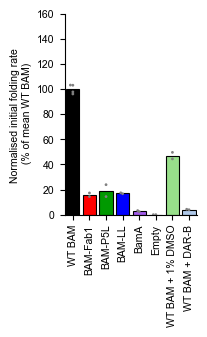

In [31]:


dict_for_plotting = {cond:tOmpA_norm_WTBAM_init_rate_dict[cond] for cond in conds_list}
plots.plot_norm_init_rates(
    dict_for_plotting, 
    colors=colours_list, 
    y_limits=[0,160],
    fig_size=[2.1,3.4],
    save="tOmpA_all_init_rates"
    )

Saving as OmpX_all_init_rates.png


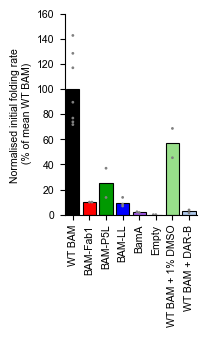

In [32]:
dict_for_plotting = {cond:OmpX_norm_WTBAM_init_rate_dict[cond] for cond in conds_list}
plots.plot_norm_init_rates(
    dict_for_plotting, 
    y_limits=[0,160],
    fig_size=[2.1,3.4],
    colors=colours_list,
    save="OmpX_all_init_rates.png"
)

# Figure 1e - tOmpA init rates Dar only 

In [9]:
tOmpA_norm_WTBAMDMSO_init_rate_dict = calcs.init_rates_as_percent_control(tOmpA_init_rat_dict, "WT BAM + 1% DMSO")

Condition: WT BAM
Condition: BAM-Fab1
Condition: BAM-P5L
Condition: BAM-LL
Condition: Empty
Condition: BamA
Condition: BAM-P5L + DTT
Condition: BAM-LL + DTT
Condition: BAM-P5L + Fab1
Condition: BAM-LL + Fab1
Condition: Cys-Free BAM
Condition: WT BAM + DTT
Condition: Cys-Free BAM + DTT
Condition: WT BAM + DAR-B
Condition: WT BAM + 1% DMSO


Saving as tOmpA_DAR-B_init_rates.png


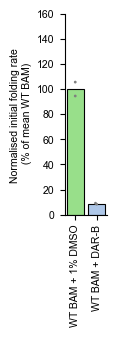

In [27]:
new_list = ["WT BAM + 1% DMSO", "WT BAM + DAR-B"]
colours_list = [colours_dict[cond] for cond in new_list]
dict_for_plotting = {cond:tOmpA_norm_WTBAMDMSO_init_rate_dict[cond] for cond in new_list}
plots.plot_norm_init_rates(
    dict_for_plotting, 
    y_limits=[0,160],
    fig_size=[1.2,3.4],
    colors=colours_list,
    save="tOmpA_DAR-B_init_rates.png"
)

In [11]:
OmpX_norm_WTBAMDMSO_init_rate_dict = calcs.init_rates_as_percent_control(OmpX_init_rat_dict, "WT BAM + 1% DMSO")

Condition: WT BAM
Condition: BAM-Fab1
Condition: BAM-P5L
Condition: BAM-LL
Condition: Empty
Condition: BamA
Condition: BAM-P5L + DTT
Condition: BAM-LL + DTT
Condition: BAM-P5L + Fab1
Condition: BAM-LL + Fab1
Condition: WT BAM + DAR-B
Condition: WT BAM + 1% DMSO


Saving as OmpX_DAR-B_init_rates.png


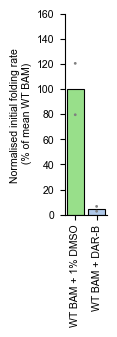

In [29]:
new_list = ["WT BAM + 1% DMSO", "WT BAM + DAR-B"]
colours_list = [colours_dict[cond] for cond in new_list]
dict_for_plotting = {cond:OmpX_norm_WTBAMDMSO_init_rate_dict[cond] for cond in new_list}
plots.plot_norm_init_rates(
    dict_for_plotting, 
    y_limits=[0,160],
    fig_size=[1.2,3.4],
    colors=colours_list,
    save="OmpX_DAR-B_init_rates.png"
)

In [34]:
OmpX_norm_WTBAMDMSO_init_rate_dict

{'WT BAM': {'191126_WT_OmpX_FOLDING': 129.62232130227588,
  '191127_WT-OmpX_FOLD': 125.79125085697791,
  '191128_WT_OmpX_FOLDING': 134.93902779164816,
  'Charlotte BAM WT OmpX 141119': 205.17028776116396,
  'Charlotte BAM WT OmpX 2 211119': 250.36260837347143,
  'OmpX bandshift BAM': 225.35788223228644,
  'OmpX bandshift BAM new cleaved SurA_2': 157.04409154247963},
 'BAM-Fab1': {'FAB1_1': 17.511159431834496, 'FAB1_2': 17.527528577315906},
 'BAM-P5L': {'Charlotte BAM PL OmpX 141119': 24.015895561187026,
  'Charlotte BAM PL OmpX 2 211119': 64.86213749660104},
 'BAM-LL': {'191126_LL1_OmpX_FOLDING': 12.027971798284684,
  '191127_LL-OmpX_FOLD': 14.69647581398808,
  '191128_LL_OmpX_FOLDING': 24.11543463857048},
 'Empty': {'Charlotte Empty OmpX 141119': -2.100990758058135e-08,
  'Charlotte Empty OmpX 211119': -2.100990758058135e-08},
 'BamA': {'BamA PLE OmpX folding assay 1': 3.000301400708577,
  'BamA PLE OmpX folding assay 2': 3.9826976223991872},
 'BAM-P5L + DTT': {'Charlotte BAM PL DTT O